# 이코테 2021 예제

## 그리디

### <문제 1> 1이 될 때까지
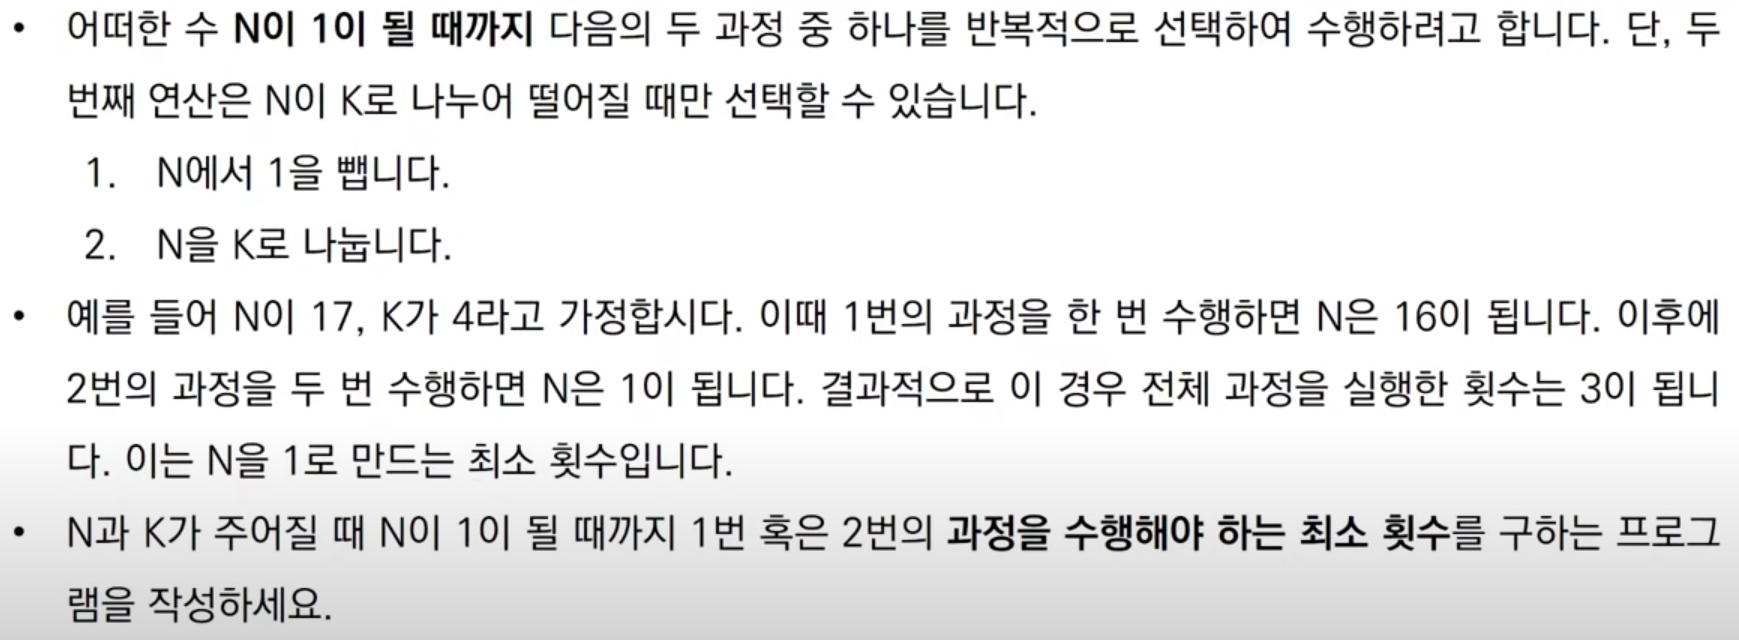

- 입력
    - 첫째 줄에 N(1 <= N <= 100,000)과 K(2 <= <= 100,000)가 공백을 기준으로 각각 자연수
- 출력
    - 첫째 줄에 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 횟수의 최솟값 출력

In [2]:
# 내 코드
n, k = map(int, input().split())
result = 0

while n != 1:   # n = 1이 될 때까지 반복
    result += 1
    if n % k:   # n이 k로 나누어 떨어지지 않는 경우
        n -= 1  # n -1
    else:
        n /= k  # n / k

print(result)

25 3
6


In [4]:
# 모범 답안 -> -1씩 하는 연산을 한번에 처리해서 시간 복잡도를 log복잡도로
n, k = map(int, input().split())
result = 0

while True:
    target = (n // k) * k
    result += (n - target)
    n = target

    if n < k:
        break

    result += 1
    n //= k

result += (n - 1)
print(result)

25 3
6


### <문제 2> 곱하기 혹은 더하기
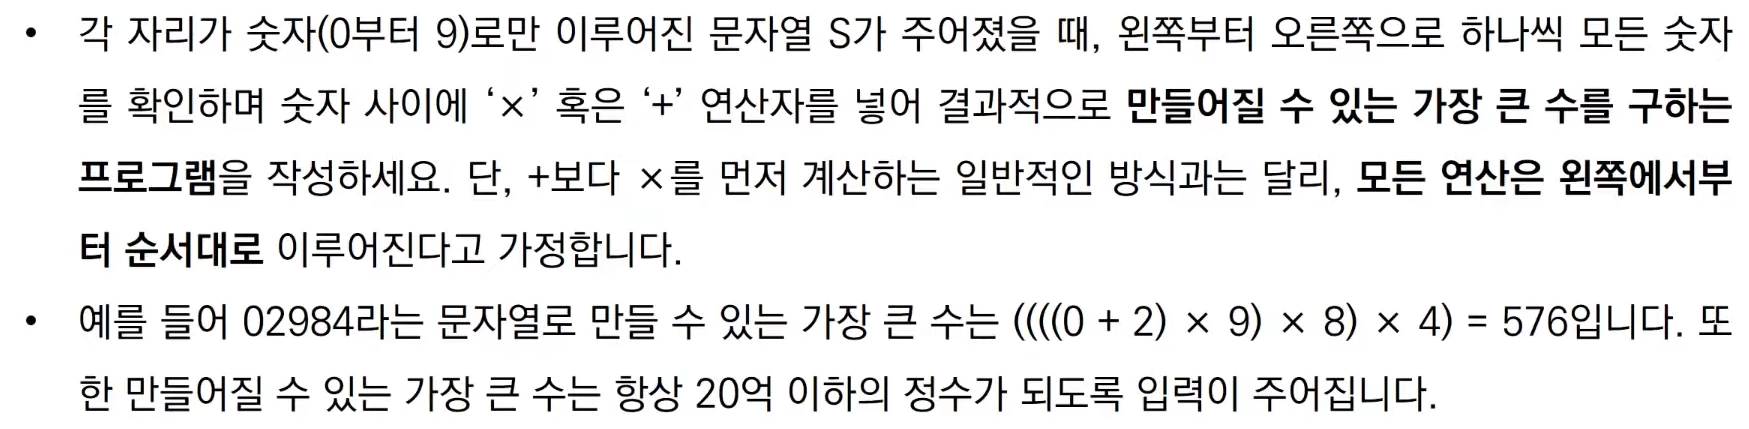
- 입력
    - 첫째 줄에 여러 개의 숫자로 구성된 하나의 문자열 S가 주어집니다. (1 <= len(S) <= 20)
- 출력
    - 첫째 줄에 만들어질 수 있는 가장 큰 수를 출력합니다.

In [5]:
# 내 코드: 이러면 틀림ㅋㅋ
s = input()
result = 0
prev = 0
for i in s:
    i = int(i)
    if prev: # 1도 곱하기보다 더하기가 더 큼
        result *= i
        prev = i # prev가 0이나 1이어도 중간에 나오는건 상관 없음
    else:
        result += i
        prev = i

print(result)

567
210


In [17]:
# 모범 답안
data = input()

result = int(data[0])

for i in range(1, len(data)):
    # 두 수 중에서 하나라도 '0' 또는 '1'인 경우 더하기 수행
    num = int(data[i])
    if num <= 1 or result <= 1:
        result += num
    else:
        result *= num

print(result)

567
210


### <문제 3> 모험가 길드
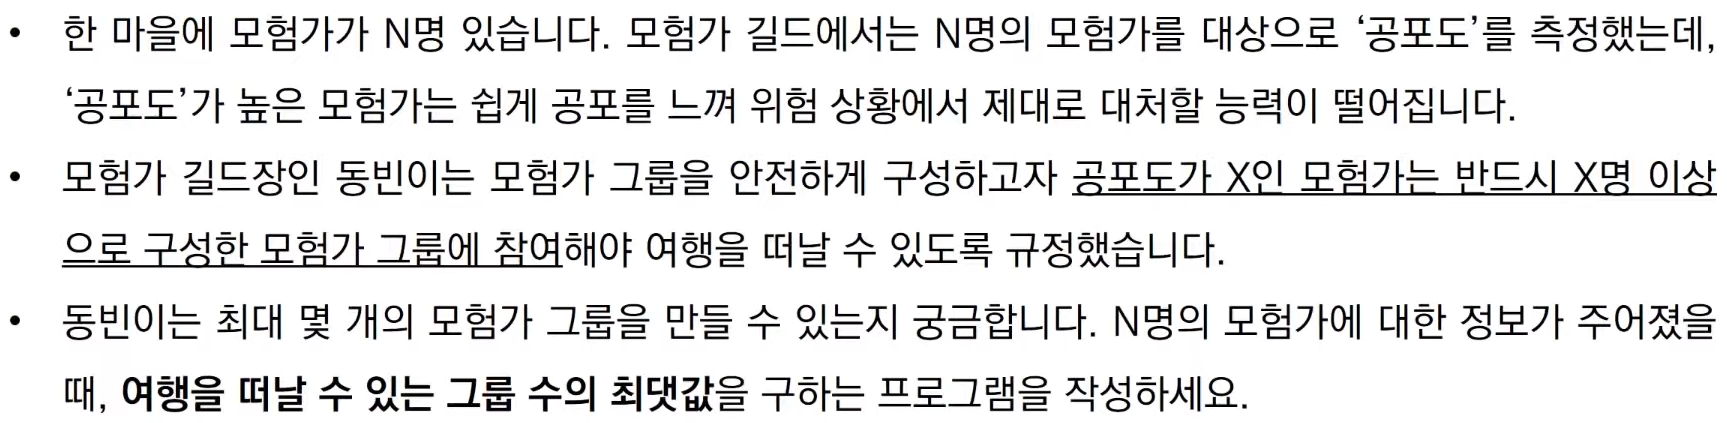
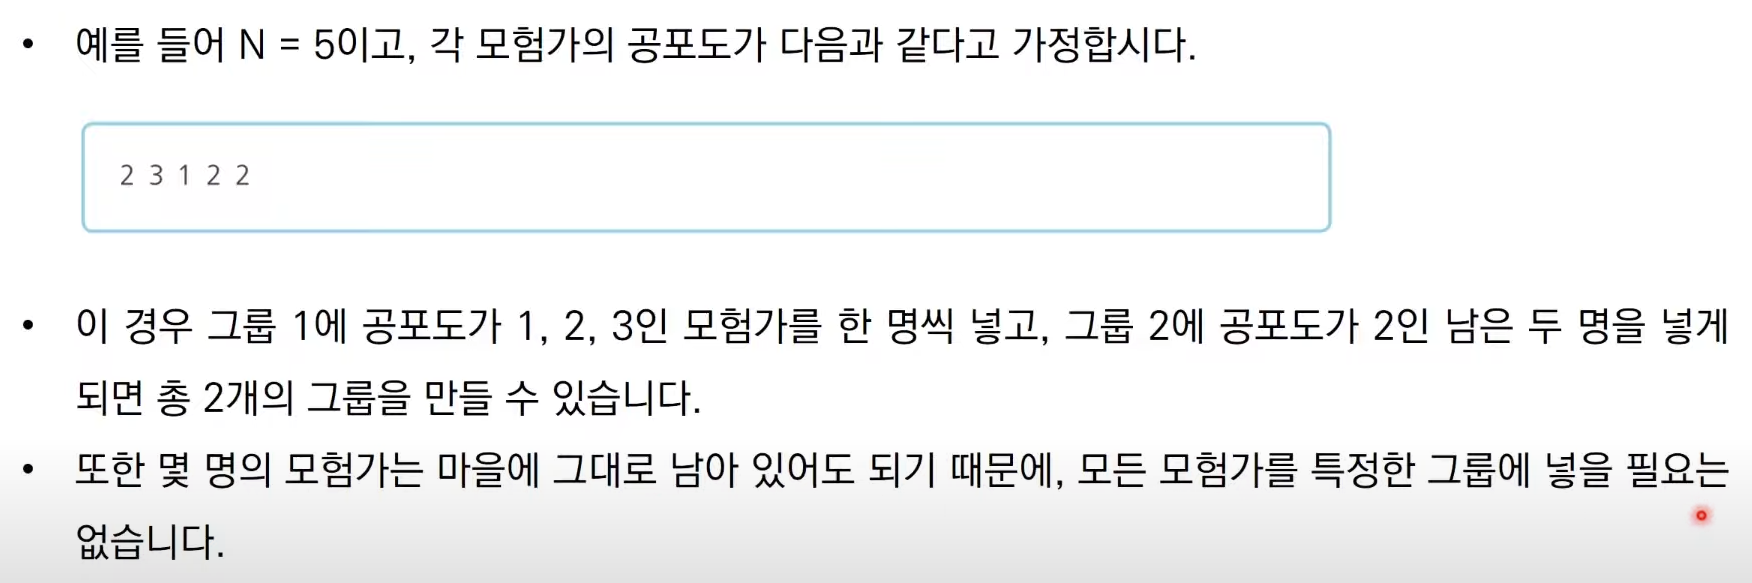
- 입력
    - 첫째 줄에 모험가 수 N이 주어집니다.(1 <= N <= 100,000)
    - 둘째 줄에 각 모험가의 공포도 값을 N 이하의 자연수로 주어지며, 각 자연수는 공백으로 구분합니다.
- 출력
    - 여행을 떠날 수 있는 그룹 수의 최댓값을 출력합니다.

In [14]:
# 모범 답안
n = int(input())
data = list(map(int, input().split()))
data.sort()

result = 0          # 총 그룹의 수
count = 0           # 현재 그룹에 포함된 모험가의 수

for i in data:      # 공포도를 낮을 것부터 하나씩 확인
    count += 1      # 현재 그룹에 해당 모험가를 포함
    if count >= i:  # 현재 그룹에 포함된 모험가의 수가 현재의 공포도 이상이면
        result += 1 # 그룹 하나 결성
        count = 0   # 모험가의 수 초기화
        
print(count)

5
1 4 1 1 1
1 1 0
1 1 1
1 1 2
1 1 3
4 1 4
4


## 구현

### 상하좌우
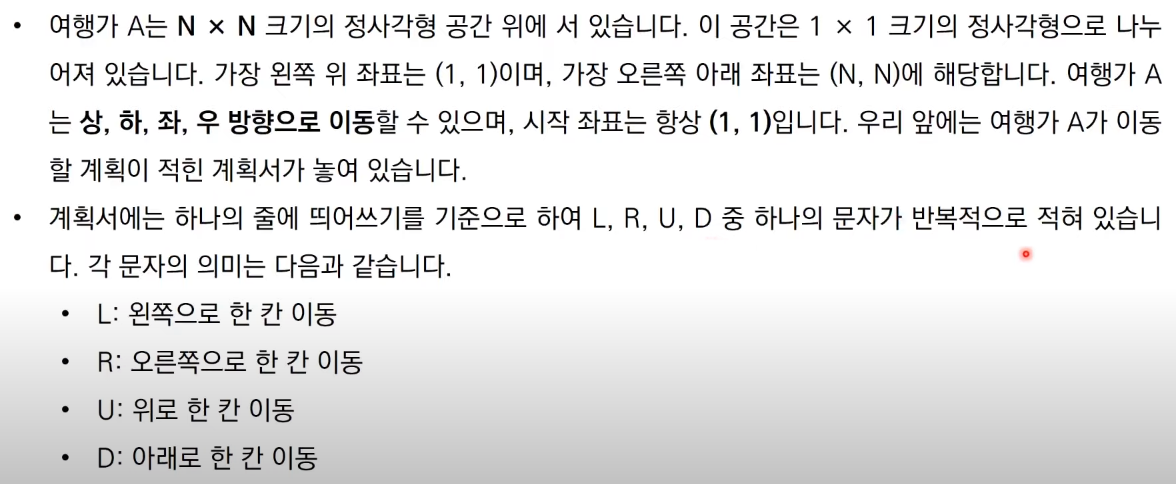
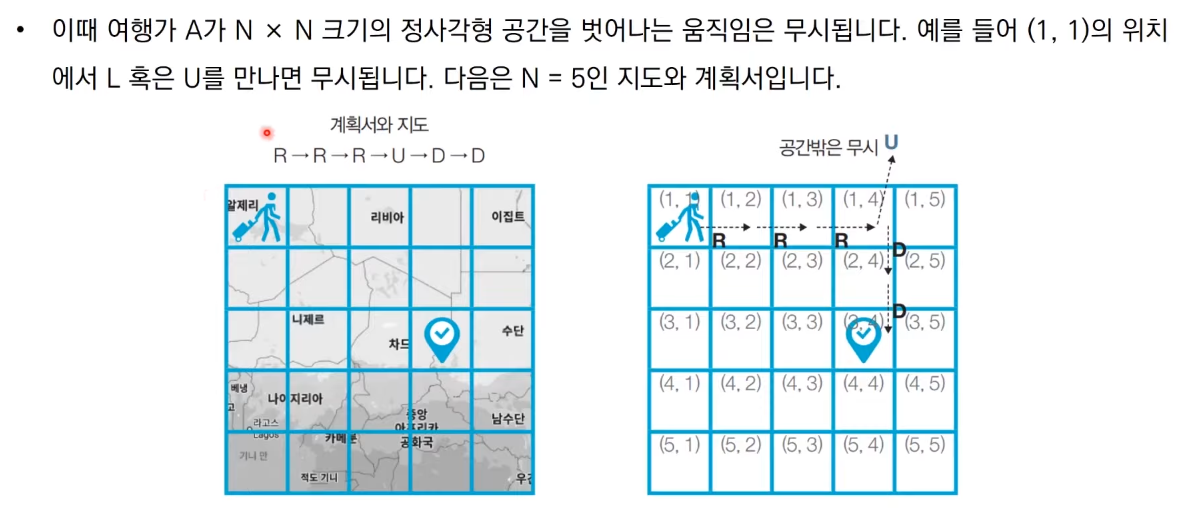
- 입력
    - 첫째 줄에 공간의 크기를 나타내는 N이 주어집니다.(1 <= N <= 100)
    - 둘째 줄에 이동할 계획서 내용이 주어집니다.(1 <= 이동 횟수 <= 100)
- 출력
    - 첫째 줄에 최종적으로 도착할 지점의 좌표(X, Y)를 공백을 기준으로 구분하여 출력합니다.

In [4]:
# 내 코드
n = int(input())
moves = input().split()
position = [1, 1] # 꼭 묶여있을 필요는 없음

for move in moves: 
    if move == 'L': # 이렇게 하나씩 하기보다 리스트로 만들어서
        if position[1] > 1:
            position[1] -= 1
    elif move == 'R':
        if position[1] < n+1:
            position[1] += 1
    elif move == 'U':
        if position[0] > 1:
            position[0] -= 1
    elif move == 'D':
        if position[0] < n+1:
            position[0] += 1
print(*position)

5
R R R U D D
3 4


In [8]:
# 모범답안
n = int(input())
plans = input().split()
x, y = 1, 1

dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
move_types = ['L', 'R', 'U', 'D']

for plan in plans:
    for i in range(len(move_types)):
        if plan == move_types[i]:
            nx = x + dx[i]
            ny = y + dy[i]
        
    if nx < 1 or ny < 1 or nx > n or ny > n:
        continue
        
    x, y = nx, ny

print(x, y)

5
R R R U D D
3 4


### 시각
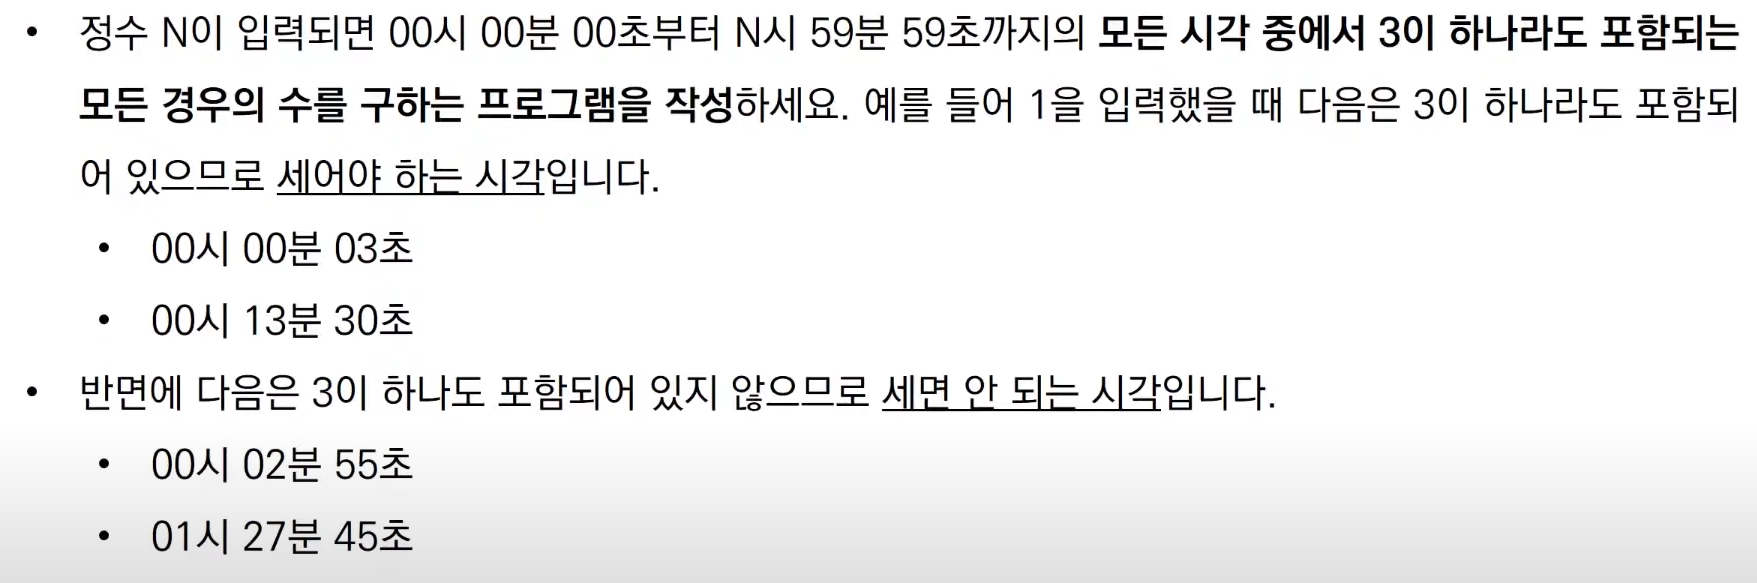
- 입력
    - 첫째 줄에 정수 N이 입력됩니다.(0 <= N <= 23)
- 출력
    - 00시 00분 00초 부터 N시 59분 59초까지의 모든 시각 중에서 3이 하나라도 포함되는 모든 경우의 수 출력

In [15]:
# 내 코드 / 모범답안도 비슷함
n = int(input())
cnt = 0
for i in range(0, n+1):
    for j in range(0, 60):
        for k in range(0, 60):
            if '3' in (str(i) + str(j) + str(k)):
                cnt += 1
print(cnt)

5
11475


### 왕실의 나이트
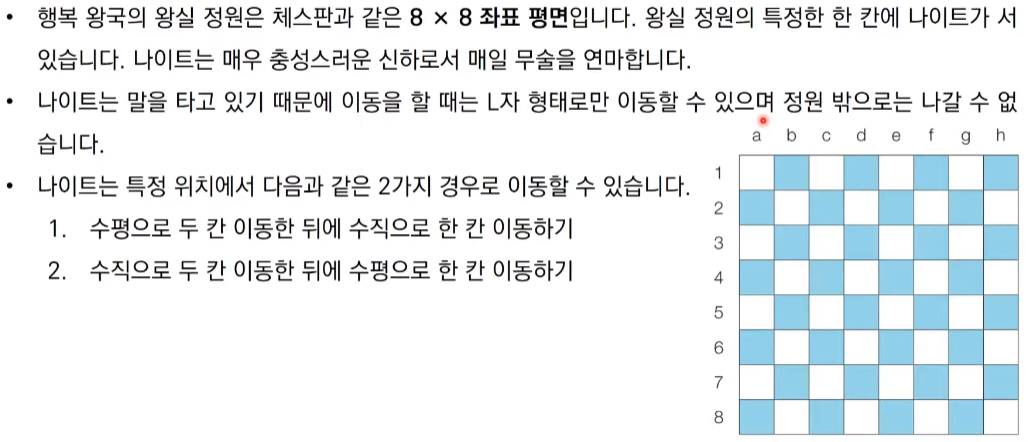
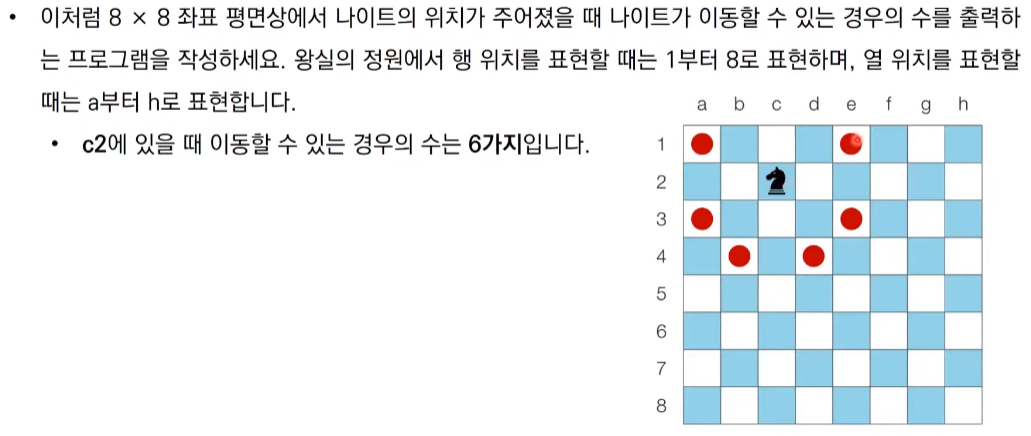
- 입력
    - 첫째 줄에 8×8 좌표 평면상에서 현재 나이트가 위치한 곳의 좌표를 나타내는 두 문자로 구성된 문자열이 입력된다.
    - 입력 문자는 a1처럼 열과 행으로 이뤄진다.
- 출력
    - 첫째 줄에 나이트가 이동할 수 있는 경우의 수를 출력하시오.

In [28]:
# 내 코드
position = input()
dx = [1, 2, 2, 1, -1, -2, -2, -1] # 튜플로 묶어서 리스트 하나로도 가능
dy = [-2, -1, 1, 2, 2, 1, -1, -2]
count = 0

for i in range(8):
    nx = chr(ord(position[0]) + dx[i])
    ny = int(position[1]) + dy[i]
    if ('a' <= nx <= 'h') and (1 <= ny <= 8):
        count += 1

print(count)

c2
e 1
e 3
d 4
b 4
a 3
a 1
6


In [31]:
# 모범답안
input_data = input()
row = int(input_data[1])
column = int(ord(input_data[0])) - int(ord('a')) + 1

steps = [(-2, -1), (-1, -2), (1, -2), (2, -1), (2, 1), (1, 2), (-1, 2), (-2, 1)]

result = 0
for step in steps:
    next_row = row + step[0]
    next_column = column + step[1]
    if next_row >= 1 and next_row <= 8 and next_column >= 1 and next_column <= 8:
        result += 1

print(result)

c2
6


### 문자열 재정렬
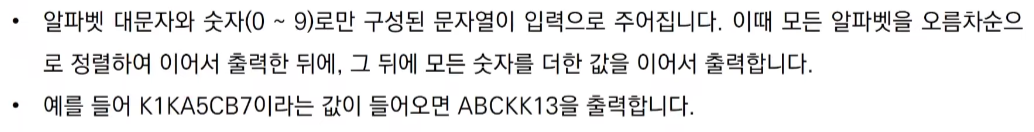
- 입력
    - 첫째 줄에 하나의 문자열 S가 주어집니다.(1 <= S의 길이 <= 10,000)
- 출력
    - 첫째 줄에 문제에서 요구하는 정답을 출력합니다.

In [44]:
# 내 코드
s = input()
s_list = list()
total = 0
result = ''
for char in s:
    try: # .isalpha() 오늘 배운 메소드를 쓰자
        total += int(char)

    except:
        s_list.append(char)

s_list.sort()
for char in s_list: # ''.join() 메소드를 까먹지 말자
    result += char

result += str(total) # 숫자가 없으면 total = 0이 붙어버림

print(result)

K1KA5CB7
ABCKK13


In [45]:
# 모범답안
data = input()
result = []
value = 0

for x in data:
    if x.isalpha():
        result.append(x)
    else:
        value += int(x)

result.sort()

if value != 0:
    result.append(str(value))

print(''.join(result))

K1KA5CB7
ABCKK13


## 3. DFS & BFS

### 음료수 얼려먹기
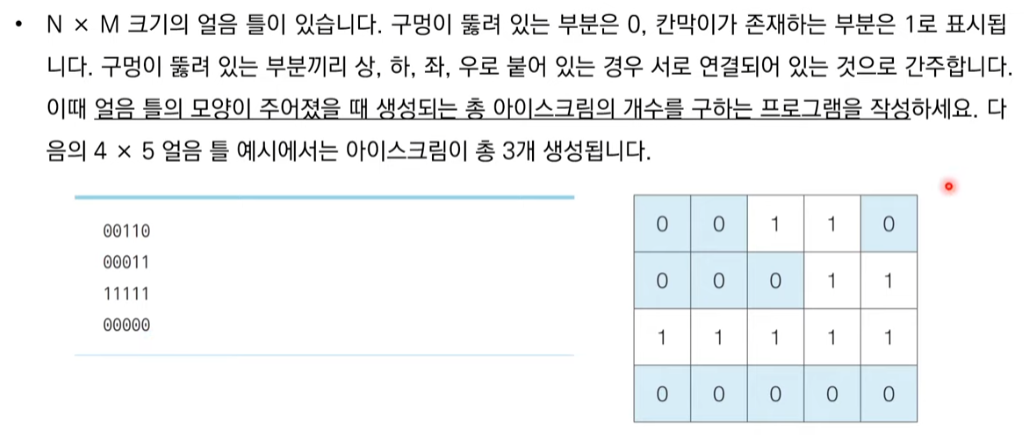
- 입력
    - 첫 번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M이 주어집니다. (1 <= N, M <= 1000)
    - 두 번째 줄 부터 N+1번째 줄까지 얼음 틀의 형태가 주어집니다.
    - 이때 구멍이 뚫려있는 부분은 0, 그렇지 않은 부분은 1입니다.
- 출력
    - 한 번에 만들 수 있는 아이스크림의 개수를 출력합니다.

- 입력 예시<br>
4 5<br>
00110<br>
00011<br>
11111<br>
00000

In [4]:
# 내 코드
# 첫 줄 입력 받기
n, m = map(int, input().split())
# 두 번째 줄부터 입력을 받아 2차원 리스트로
ice_tool = []
for _ in range(n):
    step = []
    data = input()
    for j in range(m):
        step.append(int(data[j]))
    ice_tool.append(step)

# 방문 확인을 위한 리스트
check_list = [[False]*m]*n

# 네 방향
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]
start = [0, 0]
def icecream(ice_tool, xy, check_list):
    pass

4 5
00110
00011
11111
00000


In [7]:
# 1. 특정한 지점의 주변 상, 하, 좌, 우를 살펴본 뒤에 주변 지점 중에서 값이 0이면서 방문하지 않은 지점이 있다면 해당 지점 방문
# 2. 방문한 지점에서 다시 상, 하, 좌, 우를 살펴보면서 방문을 진행하는 과정을 반복하면, 연결된 모든 지점을 방문
# 3. 모든 노드에 대하여 1~2의 과정을 반복하며, 방문하지 않은 지점의 수를 카운트

# DFS 정의
def dfs(x, y):
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    
    if graph[x][y] == 0:
        graph[x][y] = 1
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        return True
    
    return False

n, m = map(int, input().split())

graph = []
for i in range(n):
    graph.append(list(map(int, input())))
    
result = 0
for i in range(n):
    for j in range(m):
        if dfs(i, j) == True:
            result += 1

print(result)

4 5
00110
00011
11111
00000
3


### 미로 탈출
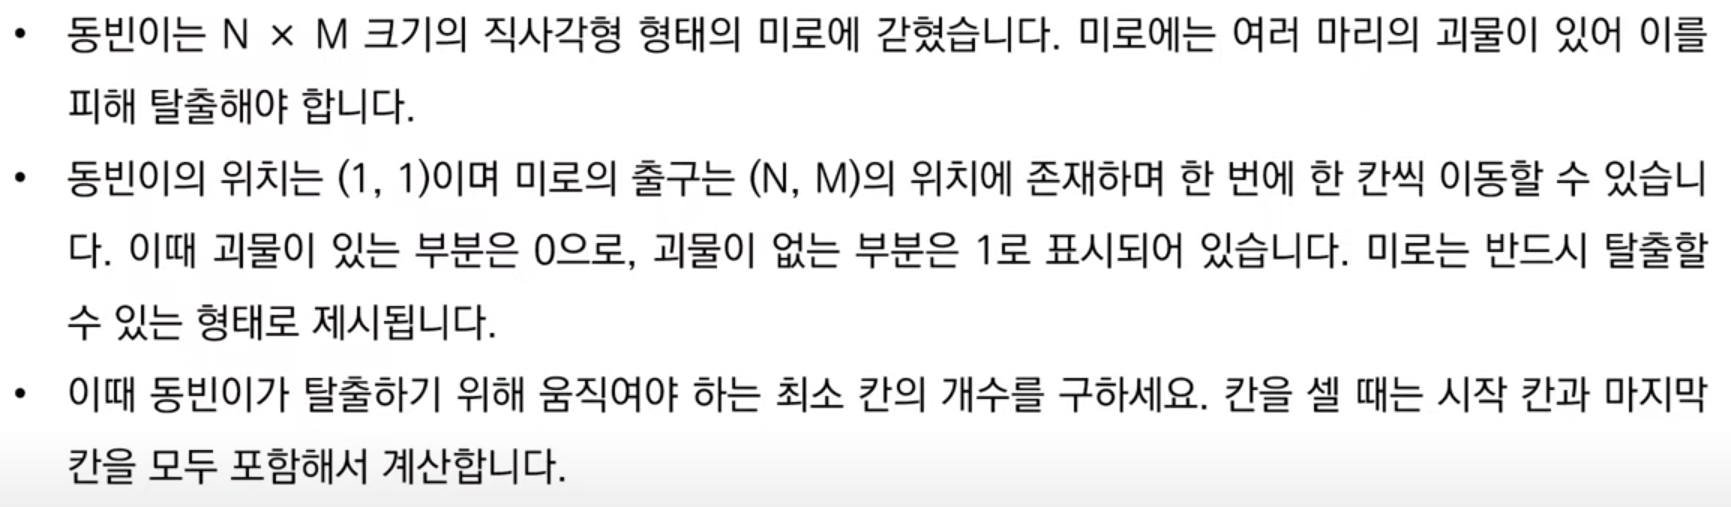
- 입력
    - 첫째 줄에 두 정수 N, M(4<=N, M<=200)이 주어집니다. 다음 N개의 줄에는 각각 M개의 정수(0 혹은 1)로 미로의 정보가 주어집니다. 각각의 수들은 공백 없이 붙어서 입력으로 제시됩니다. 또한 시작 칸과 마지막 칸은 항상 1입니다.
- 출력
    - 첫째 줄에 최소 이동 칸의 개수를 출력합니다
    
- 입력 예시<br>
5 6<br>
101010<br>
111111<br>
000001<br>
111111<br>
111111<br>

- 출력 예시<br>
10

## 4. 정렬 알고리즘

### 두 배열의 원소 교체
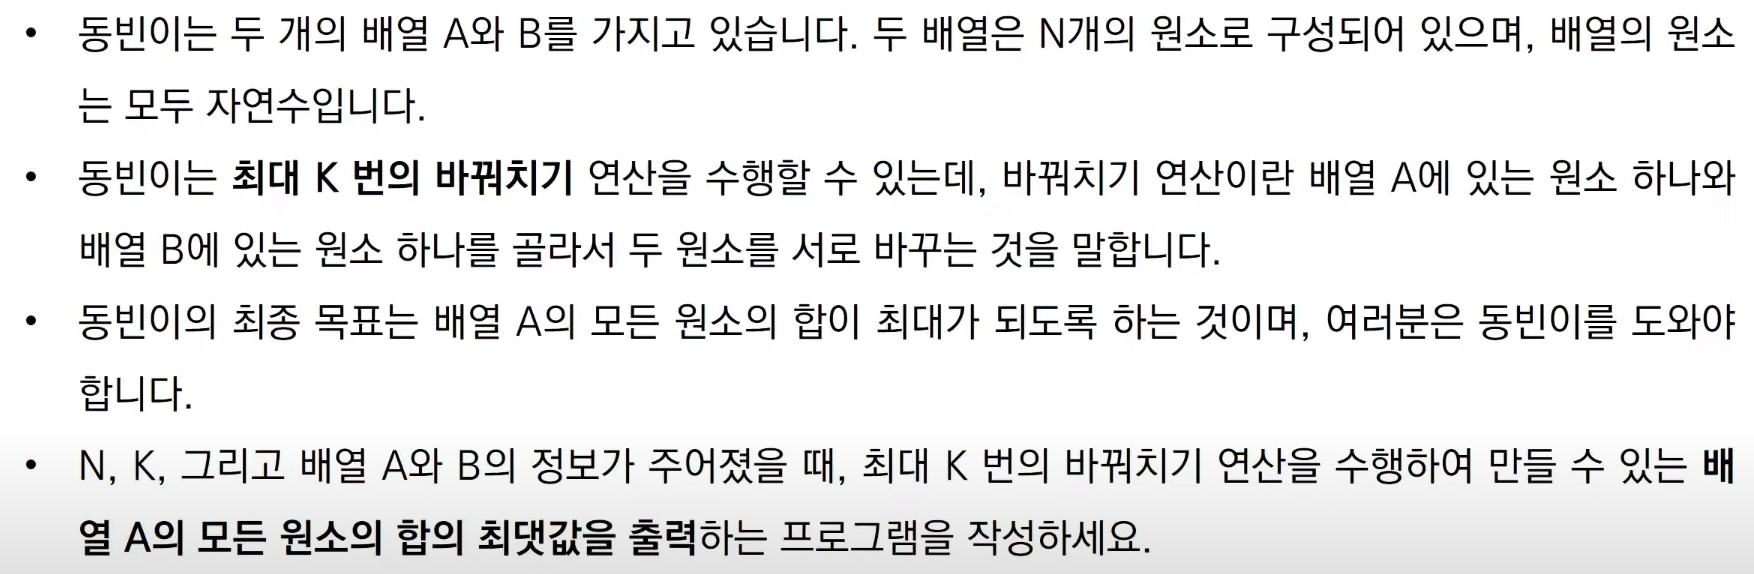
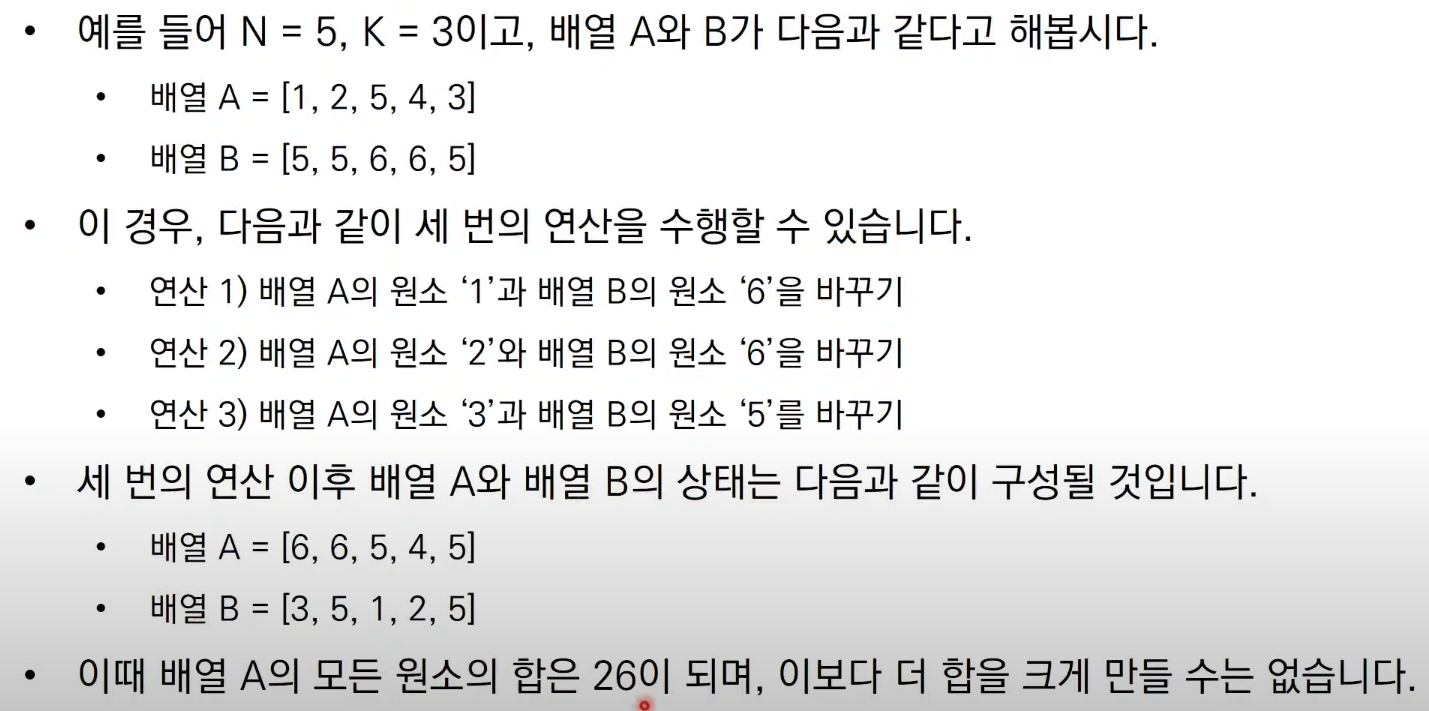
- 입력
    - 첫 번째 줄에 N, K가 공백을 기준으로 구분되어 입력됩니다. (1 <= N <= 100,000 , 0 <= K <= N)
    - 두 번째 줄에 배열 A의 원소들이 공백을 기준으로 구분되어 입력됩니다. 모든 원소는 10,000,000보다 작은 자연수입니다.
    - 세 번째 줄에 배열 B의 원소들이 공백을 기준으로 구분되어 입력됩니다. 모든 원소는 10,000,000보다 작은 자연수입니다.
- 출력
    - 최대 K번의 바꿔치기 연산을 수행하여 만들 수 있는 배열 A의 모든 원소의 합의 최대값을 출력합니다.

In [6]:
# 내 코드
n, k = map(int, input().split())
list_a = list(map(int, input().split()))
list_b = list(map(int, input().split()))

list_a.sort(reverse=True)
list_b.sort(reverse=True)
print(list_a, list_b)
print(sum(list_a[:n-k]) + sum(list_b[:k])) # 이 경우 a의 원소가 b보다 크면 문제가 생김(k번을 무조건 바꿔야 하는건 아님)

5 3
6 6 5 4 5
3 5 1 2 5
[6, 6, 5, 5, 4] [5, 5, 3, 2, 1]
25


In [10]:
# 모범 답안
n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

a.sort()
b.sort(reverse=True)

for i in range(k):
    if a[i] < b[i]: # 조건문을 통해 b의 원소가 더 크다는 사실을 확인하고 교체해야 함
        a[i], b[i] = b[i], a[i]
    else:
        break # a의 원소가 더 크다면 반복문 종료
        
print(sum(a))

5 3
5 5 6 6 5
1 2 5 4 3
27
